In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries loaded successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries loaded successfully
Pandas version: 2.1.4
NumPy version: 1.26.2


In [3]:
# Load processed data
print("Loading processed data...")

df = pd.read_csv('../data/processed/processed_churn_data.csv')

print(f"✓ Data loaded successfully!")
print(f"  Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")
print(f"\nColumn names (first 10):")
print(list(df.columns[:10]))

# Display first few rows
print(f"\nFirst 5 rows:")
df.head()

Loading processed data...
✓ Data loaded successfully!
  Shape: 7,043 rows × 59 columns

Column names (first 10):
['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'paperless_billing', 'monthly_charges', 'total_charges']

First 5 rows:


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,...,contract_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,tenure_group_1-2yr,tenure_group_2-4yr,tenure_group_4yr+,charges_category_Medium,charges_category_High,charges_category_Very High
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,False,True,False,False,False,False,False,False,False
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,True,False,True,False,True,False,False
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,False,False,False,True,False,False,False,True,False,False
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,False,False,False,False,False,True,False,True,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,True,False,False,False,False,False,True,False


In [4]:
# Data overview
print("DATA OVERVIEW")
print("=" * 60)

# Basic info
print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns")

# Check for missing values
missing = df.isnull().sum()
if missing.sum() > 0:
    print(f"\nMissing Values Found:")
    print(missing[missing > 0])
else:
    print(f"\n✓ No missing values!")

# Data types
print(f"\nData Types:")
print(df.dtypes.value_counts())

# Target variable distribution
print(f"\nTarget Variable (Churn) Distribution:")
churn_counts = df['churn'].value_counts()
churn_pct = df['churn'].value_counts(normalize=True) * 100

for idx, count in churn_counts.items():
    label = "Churned" if idx == 1 else "Not Churned"
    print(f"  {label}: {count:,} ({churn_pct[idx]:.1f}%)")

# Memory usage
memory_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"\nMemory Usage: {memory_mb:.2f} MB")

print("\n" + "=" * 60)

DATA OVERVIEW

Dataset Shape: 7,043 rows × 59 columns

✓ No missing values!

Data Types:
bool       27
float64    18
int64      13
object      1
Name: count, dtype: int64

Target Variable (Churn) Distribution:
  Not Churned: 5,174 (73.5%)
  Churned: 1,869 (26.5%)

Memory Usage: 2.24 MB



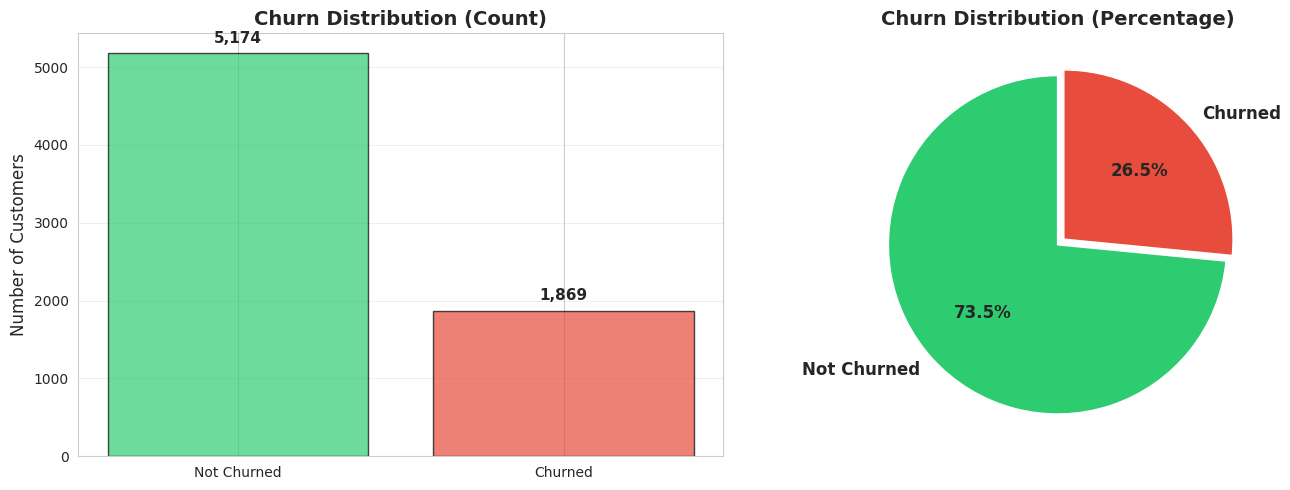

Class Imbalance Ratio: 2.77:1 (Not Churned:Churned)
This is an imbalanced dataset - we'll need to handle this in modeling


In [5]:
# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
churn_counts = df['churn'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['#2ecc71', '#e74c3c']

axes[0].bar(labels, churn_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, f'{v:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie(churn_counts.values, labels=labels, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=(0, 0.05),
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Class Imbalance Ratio: {churn_counts.values[0]/churn_counts.values[1]:.2f}:1 (Not Churned:Churned)")
print(f"This is an imbalanced dataset - we'll need to handle this in modeling")

FEATURES MOST CORRELATED WITH CHURN

TOP 10 FEATURES INCREASING CHURN RISK:
contract_risk          0.406109
payment_risk           0.274584
has_internet           0.227890
monthly_charges        0.193356
paperless_billing      0.191825
senior_citizen         0.150889
avg_monthly_revenue    0.071466
payment_failed         0.014156
payment_fail_rate      0.012793
phone_service          0.011942
Name: churn, dtype: float64

TOP 10 FEATURES DECREASING CHURN RISK:
service_complaint   -0.016020
total_services      -0.067264
partner             -0.150448
has_family          -0.162835
dependents          -0.164221
total_charges       -0.198347
tenure              -0.352229
gender                    NaN
total_tickets             NaN
sentiment_score           NaN
Name: churn, dtype: float64


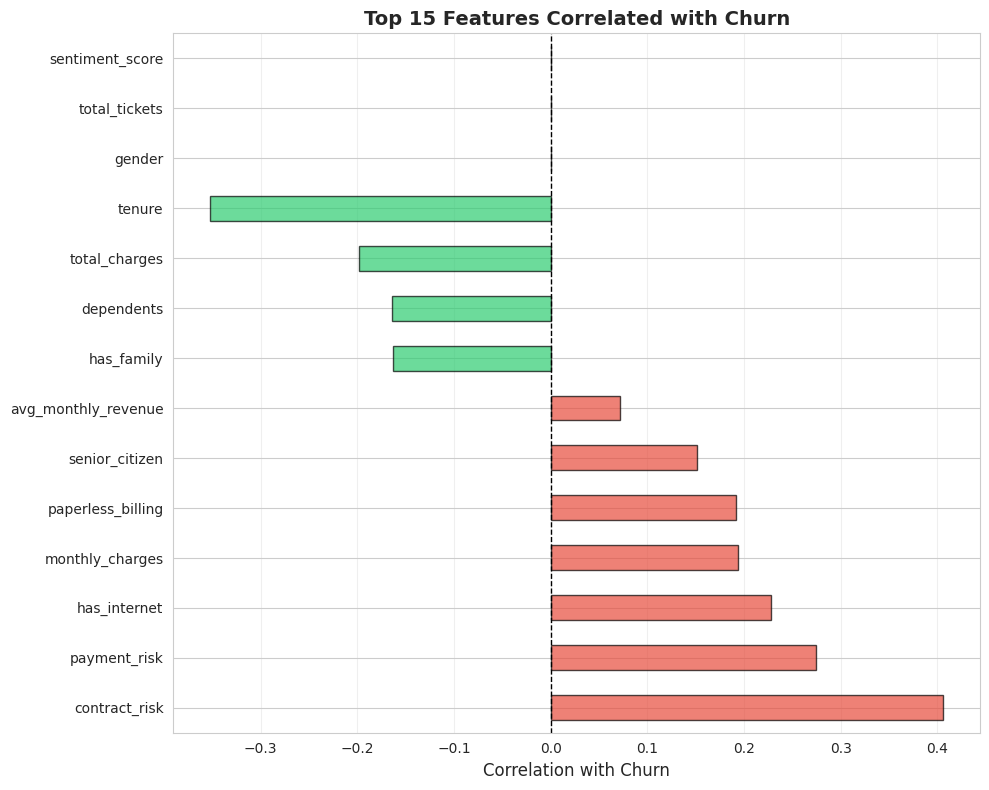


Insight: Features with positive correlation increase churn risk
   Features with negative correlation decrease churn risk


In [6]:
# Analyze correlation with churn
print("FEATURES MOST CORRELATED WITH CHURN")
print("=" * 60)

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove customer_id if present
if 'customer_id' in numeric_cols:
    numeric_cols.remove('customer_id')

# Calculate correlation with churn
correlations = df[numeric_cols].corr()['churn'].sort_values(ascending=False)

# Remove churn itself
correlations = correlations.drop('churn')

# Top positive correlations (increase churn risk)
print("\nTOP 10 FEATURES INCREASING CHURN RISK:")
print(correlations.head(10))

# Top negative correlations (decrease churn risk)
print("\nTOP 10 FEATURES DECREASING CHURN RISK:")
print(correlations.tail(10))

# Visualize top correlations
top_n = 15
top_correlations = pd.concat([correlations.head(top_n//2), correlations.tail(top_n//2)])

plt.figure(figsize=(10, 8))
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in top_correlations.values]
top_correlations.plot(kind='barh', color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Correlation with Churn', fontsize=12)
plt.title(f'Top {top_n} Features Correlated with Churn', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: Features with positive correlation increase churn risk")
print("   Features with negative correlation decrease churn risk")

CHURN ANALYSIS BY KEY FEATURES


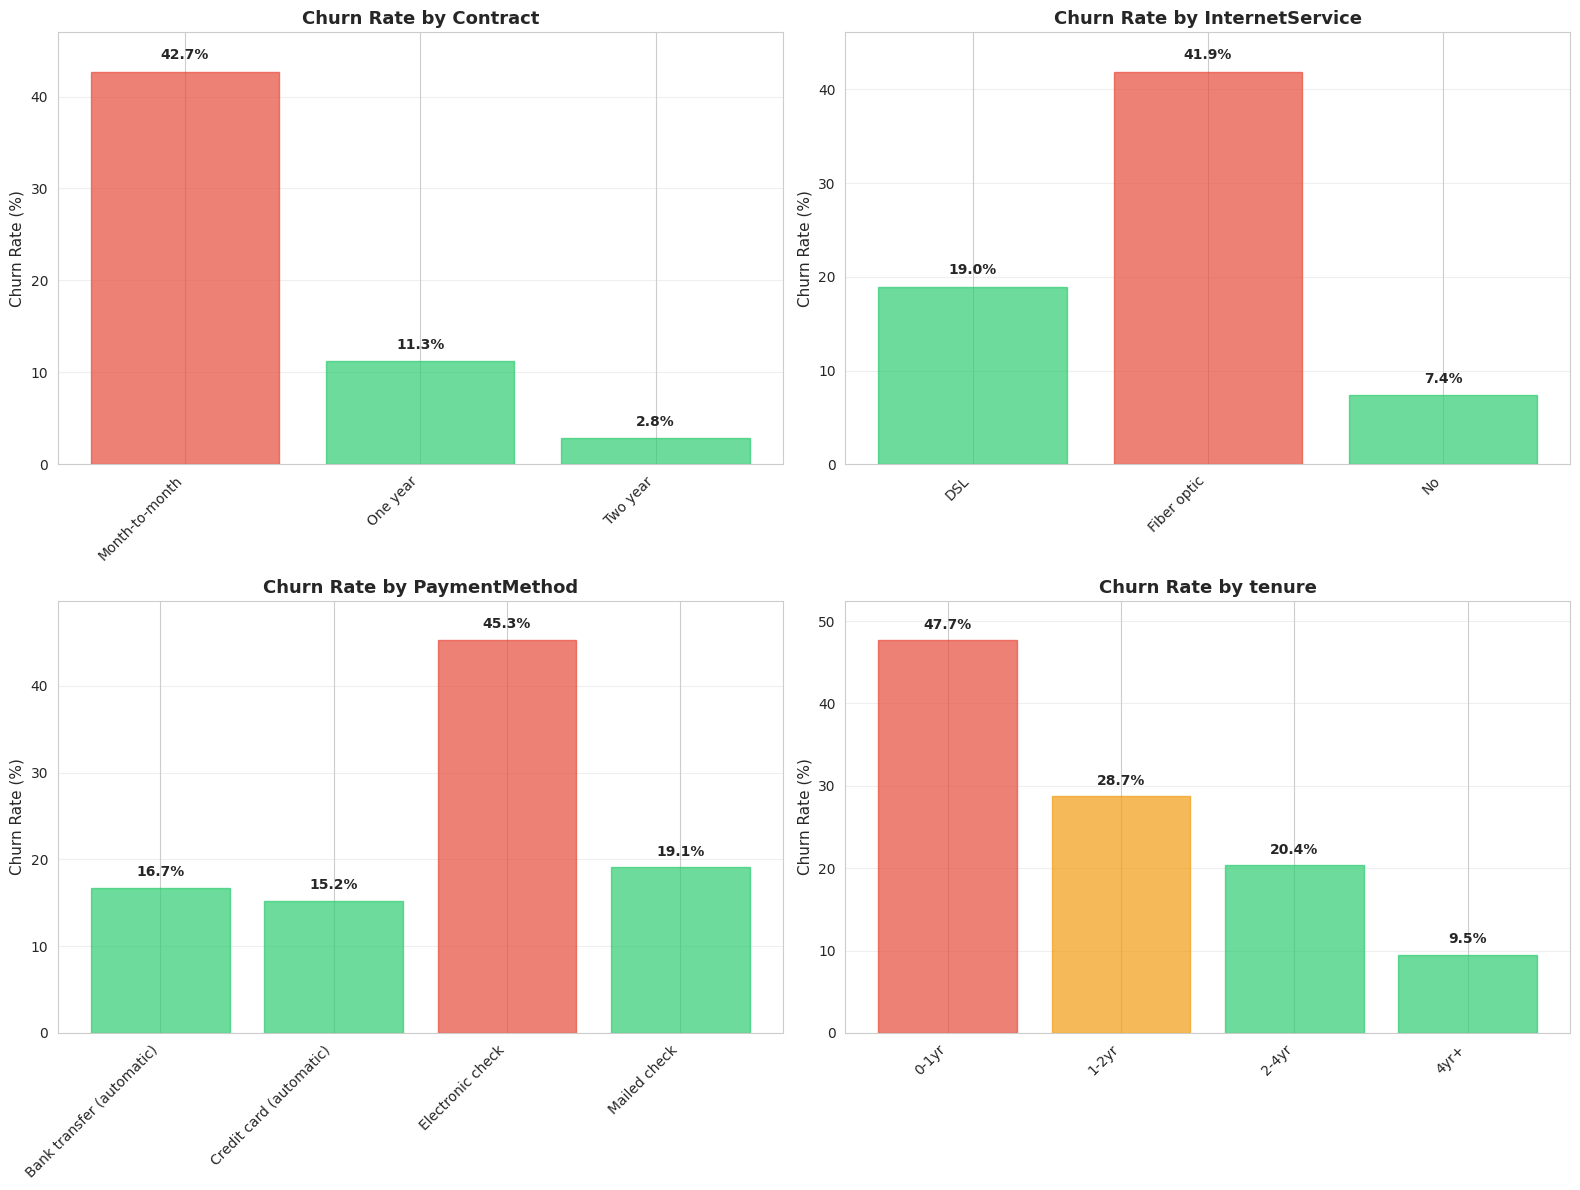


Key Insights:
   - Month-to-month contracts have highest churn
   - Fiber optic internet users churn more
   - Electronic check payment method shows high churn
   - New customers (0-1 year tenure) churn most


In [7]:
# Analyze churn by key categorical features
print("CHURN ANALYSIS BY KEY FEATURES")
print("=" * 60)

# Recreate some original categorical columns for analysis
# (since they were one-hot encoded in processing)

# Load original data for categorical analysis
df_original = pd.read_csv('../data/raw/telco_churn.csv')
df_original['Churn'] = (df_original['Churn'] == 'Yes').astype(int)

# Key features to analyze
features = ['Contract', 'InternetService', 'PaymentMethod', 'tenure']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(features):
    if feature == 'tenure':
        # For tenure, create bins
        df_original['tenure_group'] = pd.cut(df_original['tenure'], 
                                              bins=[0, 12, 24, 48, 72],
                                              labels=['0-1yr', '1-2yr', '2-4yr', '4yr+'])
        churn_by_feature = df_original.groupby('tenure_group')['Churn'].agg(['sum', 'count'])
        churn_by_feature['churn_rate'] = (churn_by_feature['sum'] / churn_by_feature['count']) * 100
        
        x_labels = churn_by_feature.index.astype(str)
        y_values = churn_by_feature['churn_rate'].values
        
    else:
        churn_by_feature = df_original.groupby(feature)['Churn'].agg(['sum', 'count'])
        churn_by_feature['churn_rate'] = (churn_by_feature['sum'] / churn_by_feature['count']) * 100
        
        x_labels = churn_by_feature.index.astype(str)
        y_values = churn_by_feature['churn_rate'].values
    
    # Create bar plot
    bars = axes[idx].bar(range(len(x_labels)), y_values, 
                         color='#3498db', alpha=0.7, edgecolor='black')
    
    # Color bars by churn rate
    for i, (bar, val) in enumerate(zip(bars, y_values)):
        if val > 40:
            bar.set_color('#e74c3c')  # High churn - red
        elif val > 25:
            bar.set_color('#f39c12')  # Medium churn - orange
        else:
            bar.set_color('#2ecc71')  # Low churn - green
    
    axes[idx].set_xticks(range(len(x_labels)))
    axes[idx].set_xticklabels(x_labels, rotation=45, ha='right')
    axes[idx].set_ylabel('Churn Rate (%)', fontsize=11)
    axes[idx].set_title(f'Churn Rate by {feature}', fontsize=13, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylim(0, max(y_values) * 1.1)
    
    # Add percentage labels on bars
    for i, v in enumerate(y_values):
        axes[idx].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', 
                      fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("   - Month-to-month contracts have highest churn")
print("   - Fiber optic internet users churn more")
print("   - Electronic check payment method shows high churn")
print("   - New customers (0-1 year tenure) churn most")